In [51]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [52]:
df = pd.read_csv('dataset/data_merged.csv')

In [53]:
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,...,valence_yr,popularity_yr,mode,key_0_yr,key_1_yr,key_2_yr,key_3_yr,key_4_yr,key_5_yr,key_6_yr
0,0.0131,0.2560,182347,0.895,0,0.000106,0.0821,-4.860,29,0.0707,...,0.583424,35.272231,1,0,0,1,0,0,0,0
1,0.9800,0.2770,206972,0.145,0,0.879000,0.1110,-19.898,0,0.0845,...,0.432251,3.672500,1,1,0,0,0,0,0,0
2,0.7950,0.6850,314667,0.483,0,0.878000,0.1130,-10.202,1,0.0337,...,0.447291,7.707000,1,0,0,0,1,0,0,0
3,0.6560,0.7880,179747,0.808,0,0.000000,0.1540,-6.590,0,0.0395,...,0.447291,7.707000,1,0,0,0,1,0,0,0
4,0.3020,0.0753,498560,0.150,0,0.884000,0.1210,-16.705,0,0.0371,...,0.443625,3.419500,1,1,0,0,0,0,0,0


In [54]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness',
       'tempo', 'valence', 'year', 'key_0', 'key_1', 'key_2', 'key_3', 'key_4',
       'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11',
       'minor', 'major', 'acousticness_ar', 'danceability_ar',
       'duration_ms_ar', 'energy_ar', 'instrumentalness_ar', 'liveness_ar',
       'loudness_ar', 'speechiness_ar', 'tempo_ar', 'valence_ar',
       'popularity_ar', 'count', 'key_0_ar', 'key_1_ar', 'key_2_ar',
       'key_3_ar', 'key_4_ar', 'key_5_ar', 'key_6_ar', 'key_7_ar', 'key_8_ar',
       'key_9_ar', 'key_10_ar', 'key_11_ar', 'minor_ar', 'major_ar',
       'acousticness_yr', 'danceability_yr', 'duration_ms_yr', 'energy_yr',
       'instrumentalness_yr', 'liveness_yr', 'loudness_yr', 'speechiness_yr',
       'tempo_yr', 'valence_yr', 'popularity_yr', 'mode', 'key_0_yr',
       'key_1_yr', 'key_2_yr', 'key_3_yr', 'ke

In [55]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,...,valence_yr,popularity_yr,mode,key_0_yr,key_1_yr,key_2_yr,key_3_yr,key_4_yr,key_5_yr,key_6_yr
count,172230.000000,172230.000000,1.722300e+05,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,...,172230.000000,172230.000000,172230.0,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000,172230.000000
mean,0.501914,0.536246,2.326718e+05,0.480989,0.067956,0.194968,0.211396,-11.777780,25.925913,0.105896,...,0.525269,25.711704,1.0,0.365111,0.058857,0.096325,0.052262,0.329356,0.092243,0.005847
std,0.379394,0.175858,1.471768e+05,0.272032,0.251670,0.332974,0.180661,5.690105,21.866745,0.183053,...,0.055638,15.219180,0.0,0.481463,0.235358,0.295037,0.222555,0.469981,0.289369,0.076241
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,...,0.378276,0.090909,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091300,0.414000,1.662000e+05,0.248000,0.000000,0.000000,0.099300,-14.935750,1.000000,0.035200,...,0.478115,7.750543,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.523000,0.547000,2.057175e+05,0.463000,0.000000,0.000498,0.138000,-10.867000,26.000000,0.045400,...,0.538017,31.149276,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.896000,0.668000,2.656000e+05,0.708000,0.000000,0.238000,0.270000,-7.532000,42.000000,0.076000,...,0.563010,36.556552,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,1.000000,3.855000,100.000000,0.971000,...,0.669676,50.873598,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Frequency')

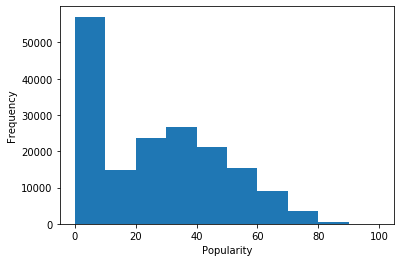

In [56]:
fig, ax = plt.subplots()
ax.hist(df["popularity"])
ax.set_xlabel("Popularity")
ax.set_ylabel("Frequency")

In [57]:
df["popularity_discrete"] = pd.cut(x=df["popularity"], bins=[-1,20,50,100], labels=[0,1,2])
df["popularity_discrete"]

0         1
1         0
2         0
3         0
4         0
5         0
6         2
7         1
8         0
9         0
10        0
11        1
12        0
13        0
14        0
15        0
16        0
17        2
18        1
19        0
20        0
21        1
22        2
23        1
24        0
25        1
26        0
27        1
28        1
29        2
         ..
172200    2
172201    2
172202    1
172203    0
172204    1
172205    0
172206    0
172207    1
172208    1
172209    1
172210    0
172211    0
172212    1
172213    2
172214    1
172215    0
172216    1
172217    1
172218    1
172219    0
172220    2
172221    0
172222    1
172223    0
172224    0
172225    0
172226    0
172227    0
172228    1
172229    1
Name: popularity_discrete, Length: 172230, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [58]:
columns = ["acousticness", "energy", "instrumentalness", "loudness", "speechiness"]
X = pd.DataFrame(df, columns=columns)
y = df["popularity_discrete"]

X.head()

,acousticness,energy,instrumentalness,loudness,speechiness
0,0.0131,0.895,0.000106,-4.860,0.0707
1,0.9800,0.145,0.879000,-19.898,0.0845
2,0.7950,0.483,0.878000,-10.202,0.0337
3,0.6560,0.808,0.000000,-6.590,0.0395
4,0.3020,0.150,0.884000,-16.705,0.0371


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [63]:
clf = Perceptron(random_state=0, max_iter=180).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred)

0.5139058236079661

In [65]:
y_pred2 = clf.predict(X_train)
accuracy_score(y_pred2, y_train)

0.5146461127561981

In [76]:
clf.decision_function(X)

array([ -5.96091332, -28.62126792, -22.90194291, ...,  -6.78572047,
       -10.75149174,  -0.04738373])

In [67]:
columns = ["acousticness", "energy", "instrumentalness", "loudness", "speechiness", "explicit"]
X1 = pd.DataFrame(df, columns=columns)
y1 = df['popularity']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20)

In [73]:
clf1 = Perceptron().fit(X_train1, y_train1)
y_pred1 = clf1.predict(X_test1)

In [74]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test1, y_pred1))
print('Mean squared error: %.2f'
      % mean_squared_error(y_test1, y_pred1))

Coefficient of determination: -0.38
Mean squared error: 659.61


In [78]:
r2_score(y_test1, y_pred1)

-0.3754039745771076

In [80]:
clf2 = Perceptron().fit(X_test1, y_test1)
y_pred2 = clf1.predict(X_test1)

In [81]:
print('Coefficient of determination: %.2f'
      % r2_score(y_test1, y_pred2))
print('Mean squared error: %.2f'
      % mean_squared_error(y_test1, y_pred2))

Coefficient of determination: -2.36
Mean squared error: 1612.90


In [82]:
r2_score(y_test1, y_pred2)

-2.363173002632526